In [1]:
import pandas as pd

데이터 프레임 만들기

In [2]:
subway_201510_df = pd.read_csv("/content/drive/MyDrive/DSL/지하철호선별_역별_승하차_인원/CARD_SUBWAY_MONTH_201510.csv", encoding = 'cp949')
subway_201610_df = pd.read_csv("/content/drive/MyDrive/DSL/지하철호선별_역별_승하차_인원/CARD_SUBWAY_MONTH_201610.csv", encoding = 'cp949')
subway_201710_df = pd.read_csv("/content/drive/MyDrive/DSL/지하철호선별_역별_승하차_인원/CARD_SUBWAY_MONTH_201710.csv", encoding = 'cp949')
subway_201810_df = pd.read_csv("/content/drive/MyDrive/DSL/지하철호선별_역별_승하차_인원/CARD_SUBWAY_MONTH_201810.csv", encoding = 'cp949')
subway_201910_df = pd.read_csv("/content/drive/MyDrive/DSL/지하철호선별_역별_승하차_인원/CARD_SUBWAY_MONTH_201910.csv", encoding = 'cp949')

In [3]:
subway_202010_df = pd.read_csv("/content/drive/MyDrive/DSL/지하철호선별_역별_승하차_인원/CARD_SUBWAY_MONTH_202010.csv", encoding = 'UTF-8')
subway_202110_df = pd.read_csv("/content/drive/MyDrive/DSL/지하철호선별_역별_승하차_인원/CARD_SUBWAY_MONTH_202110.csv", encoding = 'UTF-8')
subway_202210_df = pd.read_csv("/content/drive/MyDrive/DSL/지하철호선별_역별_승하차_인원/CARD_SUBWAY_MONTH_202210.csv", encoding = 'UTF-8')

데이터프레임 정보 얻기

한칸씩 밀리는 문제 있는 데이터프레임 처리

In [4]:
subway_202010_df = subway_202010_df.loc[:,'노선명':'등록일자']
subway_202110_df = subway_202110_df.loc[:,'노선명':'등록일자']
subway_202210_df = subway_202210_df.loc[:,'노선명':'등록일자']

In [5]:
pd.DataFrame(subway_202010_df).head(2)

,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20201001,2호선,시청,2118,1605
1,20201001,1호선,청량리(서울시립대입구),6567,6637


In [6]:
subway_202010_df.rename(columns = {'노선명':'사용일자','역명':'노선명','승차총승객수':'역명','하차총승객수':'승차총승객수','등록일자':'하차총승객수'},inplace = True)
subway_202110_df.rename(columns = {'노선명':'사용일자','역명':'노선명','승차총승객수':'역명','하차총승객수':'승차총승객수','등록일자':'하차총승객수'},inplace = True)
subway_202210_df.rename(columns = {'노선명':'사용일자','역명':'노선명','승차총승객수':'역명','하차총승객수':'승차총승객수','등록일자':'하차총승객수'},inplace = True)

In [7]:
dataframes = [subway_201510_df,subway_201610_df,subway_201710_df,subway_201810_df,subway_201910_df,subway_202010_df,subway_202110_df,subway_202210_df]

merge 함수 이용해서 하나의 데이터 프레임 만들기

In [8]:
df_10 = pd.concat(dataframes, axis = 0)
pd.DataFrame(df_10)

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20151001,경인선,중동,11414.0,10683.0,20151217.0
1,20151001,경인선,온수,8548.0,8035.0,20151217.0
2,20151001,경인선,도원,4430.0,4544.0,20151217.0
3,20151001,경인선,간석,7341.0,7088.0,20151217.0
4,20151001,경인선,부개,11951.0,11093.0,20151217.0
...,...,...,...,...,...,...
18780,20221031,6호선,버티고개,2366.0,2239.0,NaN
18781,20221031,6호선,약수,3778.0,3751.0,NaN
18782,20221031,6호선,청구,3842.0,4067.0,NaN
18783,20221031,6호선,신당,8136.0,8814.0,NaN


In [9]:
df_10.rename(columns = {'사용일자':'UsedDate','노선명':'Line','역명':'Station','승차총승객수':'Board','하차총승객수':'Alight','등록일자':'Registration'}, inplace = True)
df_10['Sum'] = df_10['Board']+df_10['Alight']
df_10['Date'] = df_10['UsedDate']%10000

pd.DataFrame(df_10)

,UsedDate,Line,Station,Board,Alight,Registration,Sum,Date
0,20151001,경인선,중동,11414.0,10683.0,20151217.0,22097.0,1001
1,20151001,경인선,온수,8548.0,8035.0,20151217.0,16583.0,1001
2,20151001,경인선,도원,4430.0,4544.0,20151217.0,8974.0,1001
3,20151001,경인선,간석,7341.0,7088.0,20151217.0,14429.0,1001
4,20151001,경인선,부개,11951.0,11093.0,20151217.0,23044.0,1001
...,...,...,...,...,...,...,...,...
18780,20221031,6호선,버티고개,2366.0,2239.0,NaN,4605.0,1031
18781,20221031,6호선,약수,3778.0,3751.0,NaN,7529.0,1031
18782,20221031,6호선,청구,3842.0,4067.0,NaN,7909.0,1031
18783,20221031,6호선,신당,8136.0,8814.0,NaN,16950.0,1031


이태원역만 포함된 데이터 프레임 만들기
concat() 함수로 이태원 데이터 프레임 만들기
groupby()를 이용해 사용일자의 오른쪽 네 글자가 같은 것을 기준으로 평균치 구하기기

In [10]:
df_10_itw = df_10[df_10['Station']=='이태원']
df_10_itw.sort_values(by = 'Sum',ascending = False).head(10)

,UsedDate,Line,Station,Board,Alight,Registration,Sum,Date
17166,20221029,6호선,이태원,48459.0,81362.0,NaN,129821.0,1029
16570,20151031,6호선,이태원,37666.0,71712.0,20151217.0,109378.0,1031
16103,20171028,6호선,이태원,39662.0,64310.0,20171031.0,103972.0,1028
15665,20181027,6호선,이태원,40276.0,61902.0,20181030.0,102178.0,1027
7558,20181013,6호선,이태원,43183.0,54732.0,20181016.0,97915.0,1013
7792,20171014,6호선,이태원,42625.0,54618.0,20171017.0,97243.0,1014
15215,20191026,6호선,이태원,38619.0,57844.0,20191029.0,96463.0,1026
9015,20151017,6호선,이태원,40597.0,48892.0,20151217.0,89489.0,1017
8113,20161015,6호선,이태원,39703.0,48687.0,20161023.0,88390.0,1015
6949,20191012,6호선,이태원,38648.0,48537.0,20191015.0,87185.0,1012


In [11]:
df_10_itw.groupby('Date').mean().sort_values(by = 'Sum',ascending = False, inplace = False).head(5)

,UsedDate,Board,Alight,Registration,Sum
Date,,,,,
1031,20186031.0,23735.000,32468.500,20171126.8,56203.500
1029,20186029.0,22695.750,28395.375,20171125.2,51091.125
1028,20186028.0,20568.000,25079.250,20171083.0,45647.250
1015,20186015.0,20845.125,23392.375,20171058.8,44237.500
1027,20186027.0,19324.500,22905.500,20171082.2,42230.000


In [12]:
df_10_31 = df_10[df_10['Date']==1031]
df_10_31.sort_values(by = 'Sum',ascending = False).head(5)

,UsedDate,Line,Station,Board,Alight,Registration,Sum,Date
17688,20181031,2호선,강남,110611.0,110664.0,20181103.0,221275.0,1031
17787,20191031,2호선,강남,108061.0,110902.0,20191103.0,218963.0,1031
16860,20151031,2호선,홍대입구,96434.0,121168.0,20151217.0,217602.0,1031
17667,20171031,2호선,강남,105742.0,104916.0,20171103.0,210658.0,1031
17209,20161031,2호선,강남,99256.0,99104.0,20161108.0,198360.0,1031


In [13]:
df_10_31.groupby('Station').mean().sort_values(by = 'Sum',ascending = False, inplace = False).head(5)

,UsedDate,Board,Alight,Registration,Sum,Date
Station,,,,,,
강남,2.018603e+07,86248.125000,87333.625000,20171126.8,173581.750000,1031.0
강변,2.015103e+07,60977.000000,61505.000000,20151217.0,122482.000000,1031.0
구로디지털단지,2.018603e+07,58410.750000,58101.750000,20171126.8,116512.500000,1031.0
신림,2.018992e+07,59072.444444,57145.666667,20171126.8,116218.111111,1031.0
잠실,2.015103e+07,56342.000000,51242.000000,20151217.0,107584.000000,1031.0


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
vis_col = ['Sum','Date']

for col in vis_col:
  print(df_10_itw[col].describe())

count       248.000000
mean      34987.830645
std       18760.592420
min       11025.000000
25%       23498.000000
50%       30410.000000
75%       40246.500000
max      129821.000000
Name: Sum, dtype: float64
count     248.000000
mean     1016.000000
std         8.962359
min      1001.000000
25%      1008.000000
50%      1016.000000
75%      1024.000000
max      1031.000000
Name: Date, dtype: float64


In [16]:
df_10_itw[vis_col]

,Sum,Date
257,25049.0,1001
634,38208.0,1002
1233,49541.0,1003
2167,31513.0,1004
2417,28173.0,1005
...,...,...
16163,28549.0,1027
16590,59783.0,1028
17166,129821.0,1029
17888,21753.0,1030


In [17]:
df1 = df_10_itw[vis_col].copy()

In [18]:
df1 = df1.set_index('Date')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


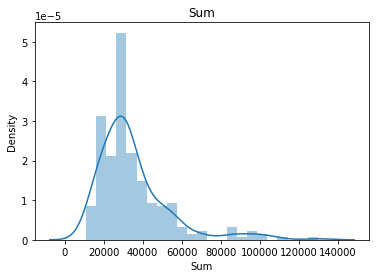

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


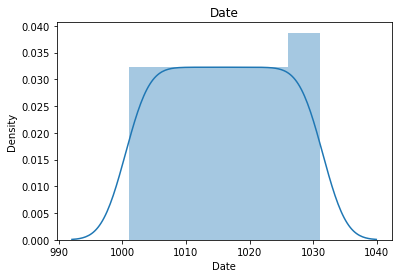

In [19]:
import scipy.stats as stats

for col in vis_col:
    sns.distplot(df_10_itw.loc[df_10_itw[col].notnull(), col])
    plt.title(col)
    plt.show()

              UsedDate     Board    Alight  Registration       Sum      Date
UsedDate      1.000000 -0.330333 -0.286620      0.999993 -0.309526  0.000390
Board        -0.330333  1.000000  0.930166      0.052378  0.974907  0.210212
Alight       -0.286620  0.930166  1.000000      0.024894  0.988555  0.206824
Registration  0.999993  0.052378  0.024894      1.000000  0.036714  0.001278
Sum          -0.309526  0.974907  0.988555      0.036714  1.000000  0.211784
Date          0.000390  0.210212  0.206824      0.001278  0.211784  1.000000


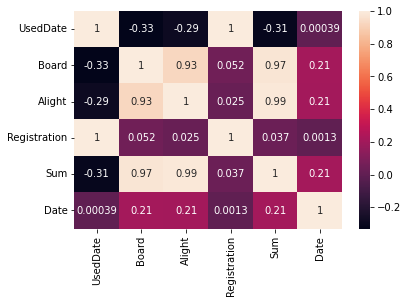

In [20]:
df_corr = df_10_itw.corr()
print(df_corr)
sns.heatmap(df_corr, annot=True)
plt.show()

10/31만 뽑아봤는데 실질적으로 의미 X

할로윈 당일, 할로윈 포함 주 금요일이나 일요일 토요일에 가장 많이 몰리는 것 확인

In [21]:
df_itw_isHallo = df_10_itw[df_10_itw['Date']==1031]
pd.DataFrame(df_itw_isHallo['Sum'])


,Sum
16570,109378.0
17348,40335.0
17812,52782.0
17676,64771.0
18195,83568.0
18356,30122.0
18388,45136.0
18778,23536.0


In [22]:
itw = df_10_itw
HalloSats = [itw[itw['UsedDate']==20151031], itw[itw['UsedDate']==20161029],itw[itw['UsedDate']==20171028], itw[itw['UsedDate']==20181027], itw[itw['UsedDate']==20191026],itw[itw['UsedDate']==20201031],itw[itw['UsedDate']==20211030],itw[itw['UsedDate']==20221029]]

df_itw_HalloSats = pd.concat(HalloSats, axis = 0)
pd.DataFrame(df_itw_HalloSats['Sum'])

,Sum
16570,109378.0
15955,83765.0
16103,103972.0
15665,102178.0
15215,96463.0
18356,30122.0
17773,59220.0
17166,129821.0


In [23]:
HalloSuns = [itw[itw['UsedDate']==20161030],itw[itw['UsedDate']==20171029], itw[itw['UsedDate']==20181028], itw[itw['UsedDate']==20191027],itw[itw['UsedDate']==20211031],itw[itw['UsedDate']==20221030]]

df_itw_HalloSuns = pd.concat(HalloSuns, axis = 0)
pd.DataFrame(df_itw_HalloSuns['Sum'])

HalloFris = [itw[itw['UsedDate']==20151030], itw[itw['UsedDate']==20161028],itw[itw['UsedDate']==20171027], itw[itw['UsedDate']==20181026], itw[itw['UsedDate']==20191025],itw[itw['UsedDate']==20201030],itw[itw['UsedDate']==20211029],itw[itw['UsedDate']==20221028]]

df_itw_HalloFris = pd.concat(HalloFris, axis = 0)
pd.DataFrame(df_itw_HalloFris['Sum'])

,Sum
16086,53674.0
15797,51280.0
15086,58457.0
15011,54487.0
14625,57254.0
17571,23962.0
17097,30341.0
16590,59783.0


In [24]:
print(df_itw_isHallo['Sum'].mean())
print(df_itw_HalloFris['Sum'].mean())
print(df_itw_HalloSats['Sum'].mean())
print(df_itw_HalloSuns['Sum'].mean())

56203.5
48654.75
89364.875
45071.666666666664


이태원에는 할로윈이 포함된 토요일에 사람이 통계적으로 유의미하게 많이 몰리는 것으로 드러남

In [25]:
con1 = itw['UsedDate']==20151031
con2 = itw['UsedDate']==20161029
con3 = itw['UsedDate']==20171028
con4 = itw['UsedDate']==20181027
con5 = itw['UsedDate']==20191026
con6 = itw['UsedDate']==20201031
con7 = itw['UsedDate']==20211030
con8 = itw['UsedDate']==20221029
con9 = itw['UsedDate']!=20151031
con10 = itw['UsedDate']!=20161029
con11 = itw['UsedDate']!=20171028
con12 = itw['UsedDate']!=20181027
con13 = itw['UsedDate']!=20191026
con14 = itw['UsedDate']!=20201031
con15 = itw['UsedDate']!=20211030
con16 = itw['UsedDate']!=20221029

df_itw_HalloSats_Y = itw.loc[con1 | con2 | con3 | con4 | con5 | con6 | con7 | con8,'Sum']
df_itw_HalloSats_N = itw.loc[con9 & con10 & con11 & con12 & con13 & con14 & con15 & con16,'Sum']

In [26]:
print(df_itw_HalloSats_Y.mean())
print(df_itw_HalloSats_N.mean())

89364.875
33175.2625


In [27]:
t_stat, p_value = stats.ttest_ind(df_itw_HalloSats_Y, df_itw_HalloSats_N, equal_var=True, alternative="two-sided")
print("t-statistics : {}, p-value : {}".format(t_stat, p_value))

t-statistics : 9.809361719803801, p-value : 2.1982369067894003e-19


그에 반해 할로윈에 사람이 가장 많았던 상위 5개의 역은 강변, 구로디지털단지 제외 통계적으로 유의미하게 차이 없는 것 확인

In [56]:
df_10_gn = df_10[df_10['Station']=='강남']
gn = df_10_gn

con1 = gn['UsedDate']==20151031
con2 = gn['UsedDate']==20161029
con3 = gn['UsedDate']==20171028
con4 = gn['UsedDate']==20181027
con5 = gn['UsedDate']==20191026
con6 = gn['UsedDate']==20201031
con7 = gn['UsedDate']==20211030
con8 = gn['UsedDate']==20221029
con9 = gn['UsedDate']!=20151031
con10 = gn['UsedDate']!=20161029
con11 = gn['UsedDate']!=20171028
con12 = gn['UsedDate']!=20181027
con13 = gn['UsedDate']!=20191026
con14 = gn['UsedDate']!=20201031
con15 = gn['UsedDate']!=20211030
con16 = gn['UsedDate']!=20221029

df_gn_HalloSats_Y = gn.loc[con1 | con2 | con3 | con4 | con5 | con6 | con7 | con8,'Sum']
df_gn_HalloSats_N = gn.loc[con9 & con10 & con11 & con12 & con13 & con14 & con15 & con16,'Sum']

t_stat, p_value = stats.ttest_ind(df_gn_HalloSats_Y, df_gn_HalloSats_N, equal_var=True, alternative="two-sided")
print("t-statistics : {}, p-value : {}".format(t_stat, p_value))
print(df_gn_HalloSats_Y.mean())
print(df_gn_HalloSats_N.mean())

t-statistics : -0.15033213811854, p-value : 0.8806257669035565
165940.75
168835.05416666667


강변은 차이가 통계적으로 유의미한 것으로 나오지만 이태원만큼 엄청난 정도는 아님

In [58]:
df_10_gb = pd.concat([df_10[df_10['Station']=='강변'], df_10[df_10['Station']=='강변(동서울터미널)']],axis = 0)
gb = df_10_gb

con1 = gb['UsedDate']==20151031
con2 = gb['UsedDate']==20161029
con3 = gb['UsedDate']==20171028
con4 = gb['UsedDate']==20181027
con5 = gb['UsedDate']==20191026
con6 = gb['UsedDate']==20201031
con7 = gb['UsedDate']==20211030
con8 = gb['UsedDate']==20221029
con9 = gb['UsedDate']!=20151031
con10 = gb['UsedDate']!=20161029
con11 = gb['UsedDate']!=20171028
con12 = gb['UsedDate']!=20181027
con13 = gb['UsedDate']!=20191026
con14 = gb['UsedDate']!=20201031
con15 = gb['UsedDate']!=20211030
con16 = gb['UsedDate']!=20221029

df_gb_HalloSats_Y = gb.loc[con1 | con2 | con3 | con4 | con5 | con6 | con7 | con8,'Sum']
df_gb_HalloSats_N = gb.loc[con9 & con10 & con11 & con12 & con13 & con14 & con15 & con16,'Sum']

t_stat, p_value = stats.ttest_ind(df_gb_HalloSats_Y, df_gb_HalloSats_N, equal_var=True, alternative="two-sided")
print("t-statistics : {}, p-value : {}".format(t_stat, p_value))

t-statistics : 2.0869694541965256, p-value : 0.03792058678124269


단순한 추정으로는 그냥 주말이라 터미널에 사람이 몰려서 그런듯(추가 분석 필요!!)

In [67]:
print(df_gb_HalloSats_Y.mean())
print(df_gb_HalloSats_N.mean())

98243.625
81338.93333333333


아래 함수 활용고려

In [72]:
from datetime import date
date(2023,1,15).weekday()

6

구로디지털단지는 회사가 많은 지역이라 그런지 주말에 오히려 통행인구수가 적은 것 확인(강변 case와 같이 추가분석 필요)

In [60]:
df_10_gd = df_10[df_10['Station']=='구로디지털단지']
gd = df_10_gd

con1 = gd['UsedDate']==20151031
con2 = gd['UsedDate']==20161029
con3 = gd['UsedDate']==20171028
con4 = gd['UsedDate']==20181027
con5 = gd['UsedDate']==20191026
con6 = gd['UsedDate']==20201031
con7 = gd['UsedDate']==20211030
con8 = gd['UsedDate']==20221029
con9 = gd['UsedDate']!=20151031
con10 = gd['UsedDate']!=20161029
con11 = gd['UsedDate']!=20171028
con12 = gd['UsedDate']!=20181027
con13 = gd['UsedDate']!=20191026
con14 = gd['UsedDate']!=20201031
con15 = gd['UsedDate']!=20211030
con16 = gd['UsedDate']!=20221029

df_gd_HalloSats_Y = gd.loc[con1 | con2 | con3 | con4 | con5 | con6 | con7 | con8,'Sum']
df_gd_HalloSats_N = gd.loc[con9 & con10 & con11 & con12 & con13 & con14 & con15 & con16,'Sum']

t_stat, p_value = stats.ttest_ind(df_gd_HalloSats_Y, df_gd_HalloSats_N, equal_var=True, alternative="two-sided")
print("t-statistics : {}, p-value : {}".format(t_stat, p_value))

t-statistics : -1.970418133780219, p-value : 0.049911897131078437


In [64]:
df_10_sl = df_10[df_10['Station']=='신림'] #2호선 + 신림선 개통으로 데이터 양 살짝 더 많음음
sl = df_10_sl

con1 = sl['UsedDate']==20151031
con2 = sl['UsedDate']==20161029
con3 = sl['UsedDate']==20171028
con4 = sl['UsedDate']==20181027
con5 = sl['UsedDate']==20191026
con6 = sl['UsedDate']==20201031
con7 = sl['UsedDate']==20211030
con8 = sl['UsedDate']==20221029
con9 = sl['UsedDate']!=20151031
con10 = sl['UsedDate']!=20161029
con11 = sl['UsedDate']!=20171028
con12 = sl['UsedDate']!=20181027
con13 = sl['UsedDate']!=20191026
con14 = sl['UsedDate']!=20201031
con15 = sl['UsedDate']!=20211030
con16 = sl['UsedDate']!=20221029

df_sl_HalloSats_Y = sl.loc[con1 | con2 | con3 | con4 | con5 | con6 | con7 | con8,'Sum']
df_sl_HalloSats_N = sl.loc[con9 & con10 & con11 & con12 & con13 & con14 & con15 & con16,'Sum']

t_stat, p_value = stats.ttest_ind(df_sl_HalloSats_Y, df_sl_HalloSats_N, equal_var=True, alternative="two-sided")
print("t-statistics : {}, p-value : {}".format(t_stat, p_value))

t-statistics : -0.12819929180785655, p-value : 0.8980842850570425


In [59]:
df_10_js = pd.concat([df_10[df_10['Station']=='잠실'], df_10[df_10['Station']=='잠실(송파구청)']],axis = 0) #환승역이라 2호선 8호선 합쳐져 데이터 양 2배배
js = df_10_js

con1 = js['UsedDate']==20151031
con2 = js['UsedDate']==20161029
con3 = js['UsedDate']==20171028
con4 = js['UsedDate']==20181027
con5 = js['UsedDate']==20191026
con6 = js['UsedDate']==20201031
con7 = js['UsedDate']==20211030
con8 = js['UsedDate']==20221029
con9 = js['UsedDate']!=20151031
con10 = js['UsedDate']!=20161029
con11 = js['UsedDate']!=20171028
con12 = js['UsedDate']!=20181027
con13 = js['UsedDate']!=20191026
con14 = js['UsedDate']!=20201031
con15 = js['UsedDate']!=20211030
con16 = js['UsedDate']!=20221029

df_js_HalloSats_Y = js.loc[con1 | con2 | con3 | con4 | con5 | con6 | con7 | con8,'Sum']
df_js_HalloSats_N = js.loc[con9 & con10 & con11 & con12 & con13 & con14 & con15 & con16,'Sum']

t_stat, p_value = stats.ttest_ind(df_js_HalloSats_Y, df_js_HalloSats_N, equal_var=True, alternative="two-sided")
print("t-statistics : {}, p-value : {}".format(t_stat, p_value))

t-statistics : 0.9574616270890278, p-value : 0.3388026408968068
